# Task - Exploratory Data Analysis - Sports

## Author - Ashutosh Panda

### Que. Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
#### Objective:- To find out the most successful teams, players and factors contributing win or loss of a team. Also, Suggest teams or players a company should endorse for its products

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading and Reading Data
### Data = Matches

In [2]:
#loading the dataset
matches = pd.read_csv("matches.csv")

In [3]:
#displaying the first 10 values of the data

matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [4]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Understanding of the columns

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
g = matches.groupby('toss_winner')
g

In [8]:
for toss,toss_df in g:
    print(toss)
    print(toss_df)

Chennai Super Kings
        id  season           city        date                        team1  \
60      61    2008     Chandigarh  2008-04-19          Chennai Super Kings   
73      74    2008      Bangalore  2008-04-28          Chennai Super Kings   
78      79    2008        Chennai  2008-05-02          Chennai Super Kings   
82      83    2008         Jaipur  2008-05-04          Chennai Super Kings   
86      87    2008          Delhi  2008-05-08             Delhi Daredevils   
..     ...     ...            ...         ...                          ...   
734  11330    2019      Bengaluru    21/04/19  Royal Challengers Bangalore   
736  11332    2019        Chennai    23/04/19          Sunrisers Hyderabad   
739  11335    2019        Chennai    26/04/19               Mumbai Indians   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   

                           team2          t

In [9]:
g.describe()

id                                      \
                            count          mean          std      min   
toss_winner                                                             
Chennai Super Kings          89.0   2755.640449  4209.405778     61.0   
Deccan Chargers              43.0    204.604651    91.891017     64.0   
Delhi Capitals               10.0  11281.400000    97.929907  11141.0   
Delhi Daredevils             80.0   1057.375000  2308.533429     15.0   
Gujarat Lions                15.0    336.800000   299.921466     13.0   
Kings XI Punjab              81.0   1791.753086  3447.088774      4.0   
Kochi Tuskers Kerala          8.0    262.000000    20.325916    237.0   
Kolkata Knight Riders        92.0   1656.380435  3242.564664      3.0   
Mumbai Indians               98.0   1598.040816  3366.647949      7.0   
Pune Warriors                20.0    354.150000    64.554567    254.0   
Rajasthan Royals             80.0   2392.725000  4092.544750     62.0   
Rising Pune Supergiant        6.0     28.000000    19.829271      2.0   
Rising Pune Supergiants       7.0    601.857143    16.886174    582.0   
Royal Challengers Bangalore  81.0   1515.432099  3098.611830      1.0   
Sunrisers Hyderabad          46.0   2533.173913  3832.594035      6.0   

                                                                  season  \
                                  25%      50%       75%      max  count   
toss_winner                                                                
Chennai Super Kings            235.00    452.0   7894.00  11414.0   89.0   
Deccan Chargers                129.50    189.0    289.00    366.0   43.0   
Delhi Capitals               11189.50  11322.5  11335.50  11413.0   10.0   
Delhi Daredevils               162.25    305.0    522.00   7948.0   80.0   
Gujarat Lions                   28.00    579.0    609.00    630.0   15.0   
Kings XI Punjab                193.00    371.0    560.00  11346.0   81.0   
Kochi Tuskers Kerala           246.25    258.5    276.25    294.0    8.0   
Kolkata Knight Riders          187.75    398.5    539.00  11343.0   92.0   
Mumbai Indians                 165.50    368.5    540.50  11415.0   98.0   
Pune Warriors                  305.50    360.0    404.25    451.0   20.0   
Rajasthan Royals               226.00    395.5    546.75  11344.0   80.0   
Rising Pune Supergiant          13.00     31.5     39.50     54.0    6.0   
Rising Pune Supergiants        589.00    598.0    615.00    625.0    7.0   
Royal Challengers Bangalore    173.00    388.0    562.00  11345.0   81.0   
Sunrisers Hyderabad            457.75    566.0    635.75  11329.0   46.0   

                                          ... win_by_runs         \
                                    mean  ...         75%    max   
toss_winner                               ...                      
Chennai Super Kings          2013.550562  ...       24.00   97.0   
Deccan Chargers              2009.906977  ...       17.00   74.0   
Delhi Capitals               2019.000000  ...       10.50   80.0   
Delhi Daredevils             2012.900000  ...       16.25  146.0   
Gujarat Lions                2016.466667  ...       10.50  144.0   
Kings XI Punjab              2013.234568  ...       18.00  138.0   
Kochi Tuskers Kerala         2011.000000  ...        0.00   55.0   
Kolkata Knight Riders        2013.586957  ...       14.00  102.0   
Mumbai Indians               2013.510204  ...       25.00   92.0   
Pune Warriors                2012.200000  ...       24.25  130.0   
Rajasthan Royals             2013.037500  ...       14.25   87.0   
Rising Pune Supergiant       2017.000000  ...        0.00   97.0   
Rising Pune Supergiants      2016.000000  ...       16.00   34.0   
Royal Challengers Bangalore  2013.604938  ...       19.00  140.0   
Sunrisers Hyderabad          2015.782609  ...       11.75   77.0   

                            win_by_wickets                                 \
                                     count   

### Looking for any null values

In [10]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [11]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

### Renaming some columns

In [13]:
matches.rename(columns = {"win_by_runs":"Bat_1", "win_by_wickets":"Ball_1"}, inplace = True)

In [14]:
matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
Bat_1               89
Ball_1              11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

### Most matches played in:- 

In [98]:
print(f"City in which Most of the  matches were played :- {matches['city'].value_counts().idxmax()}")


City in which Most of the  matches were played :- Mumbai


### Team that has won the most matches are

In [16]:
print(f"Team that has won the most matches are:- {matches['winner'].value_counts().idxmax()}")

Team that has won the most matches are:- Mumbai Indians


### Player who has been man of the match the most times

In [17]:
print(f"Player who has been man of the match the most times:- {matches['player_of_match'].value_counts().idxmax()}")

Player who has been man of the match the most times:- CH Gayle


### Most appeared Umpires

In [18]:
print(f"Most appeared Umpire 1 :-{matches['umpire1'].value_counts().idxmax()}")

Most appeared Umpire 1 :-HDPK Dharmasena


In [19]:
print(f"Most appeared Umpire 2 :-{matches['umpire2'].value_counts().idxmax()}")

Most appeared Umpire 2 :-C Shamshuddin


In [20]:
#Filling the null values with the values that we got above, cause they are common

matches['city'].fillna(value = "Mumbai", inplace  = True)

matches['winner'].fillna(value = "Mumbai Indians", inplace  = True)

matches['player_of_match'].fillna(value = "CH Gayle", inplace  = True)

matches['umpire1'].fillna(value = "HDPK Dharmasena", inplace  = True)

matches['umpire2'].fillna(value = "C Shamshuddin", inplace  = True)

matches['umpire3'].fillna(value = "NA", inplace  = True)

In [21]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
Bat_1              0
Ball_1             0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [22]:
matches.duplicated().sum()

0

### Top 10 Teams

Text(0, 0.5, 'Teams')

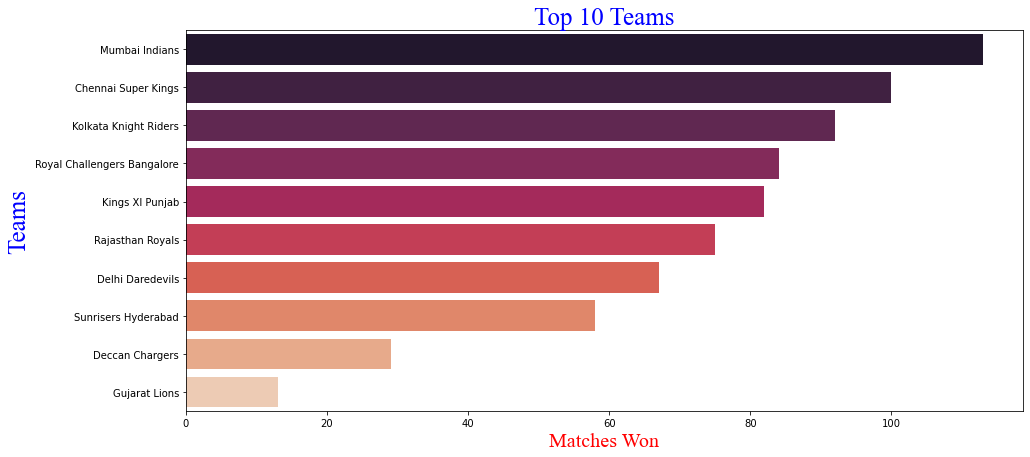

In [100]:
plt.figure(figsize = (15,7))
sns.barplot(matches['winner'].value_counts()[:10].values,matches['winner'].value_counts()[:10].index,palette="rocket" )
a1 = {'color' : 'Blue','family':'Times New Roman','size' : 25}
a2 = {'color' : 'red','family':'Times New Roman','size' : 20}
plt.title('Top 10 Teams', fontdict=a1 )

plt.xlabel('Matches Won', fontdict=a2)
plt.ylabel('Teams',fontdict=a1)

### Top 10 players

Text(0, 0.5, 'Number of times  the player has \n won the man of the match award')

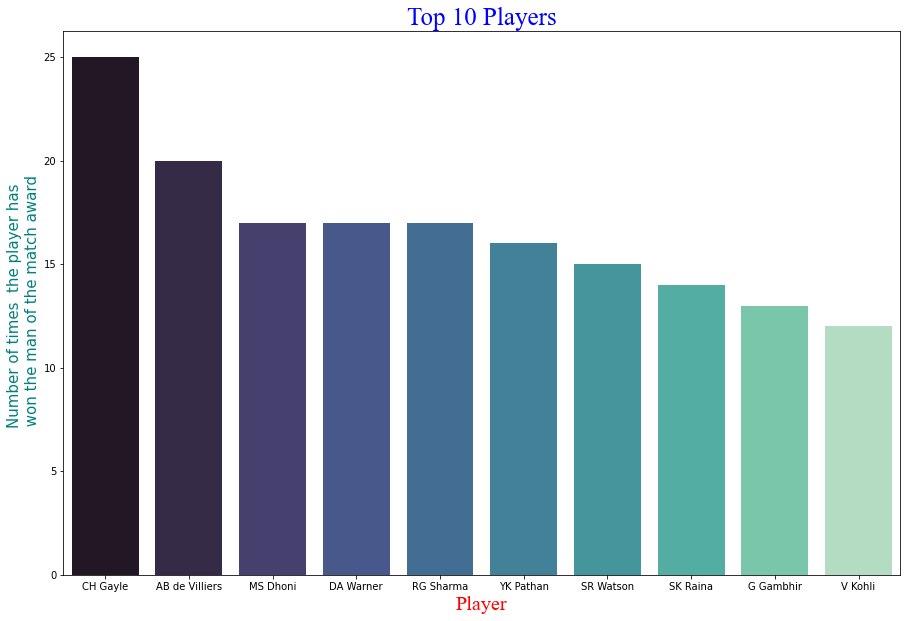

In [102]:
plt.figure(figsize = (15,10))
sns.barplot(matches['player_of_match'].value_counts()[:10].index, matches['player_of_match'].value_counts()[:10].values, palette="mako" )
a3 = {'size': 15, 'color' : 'teal'}
plt.xlabel('Player', fontdict=a2)
plt.title('Top 10 Players', fontdict=a1 )
plt.ylabel('Number of times  the player has \n won the man of the match award', fontdict=a3)



# Factors affecting the victory

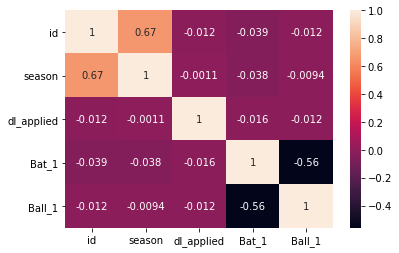

In [25]:
fac = sns.heatmap(matches.corr(), annot= True)

In [26]:
#matches = matches.drop(['dl_applied', 'season'], axis = 1)

In [27]:
matches.columns


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'Bat_1', 'Ball_1',
       'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

### Teams that have won the toss

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

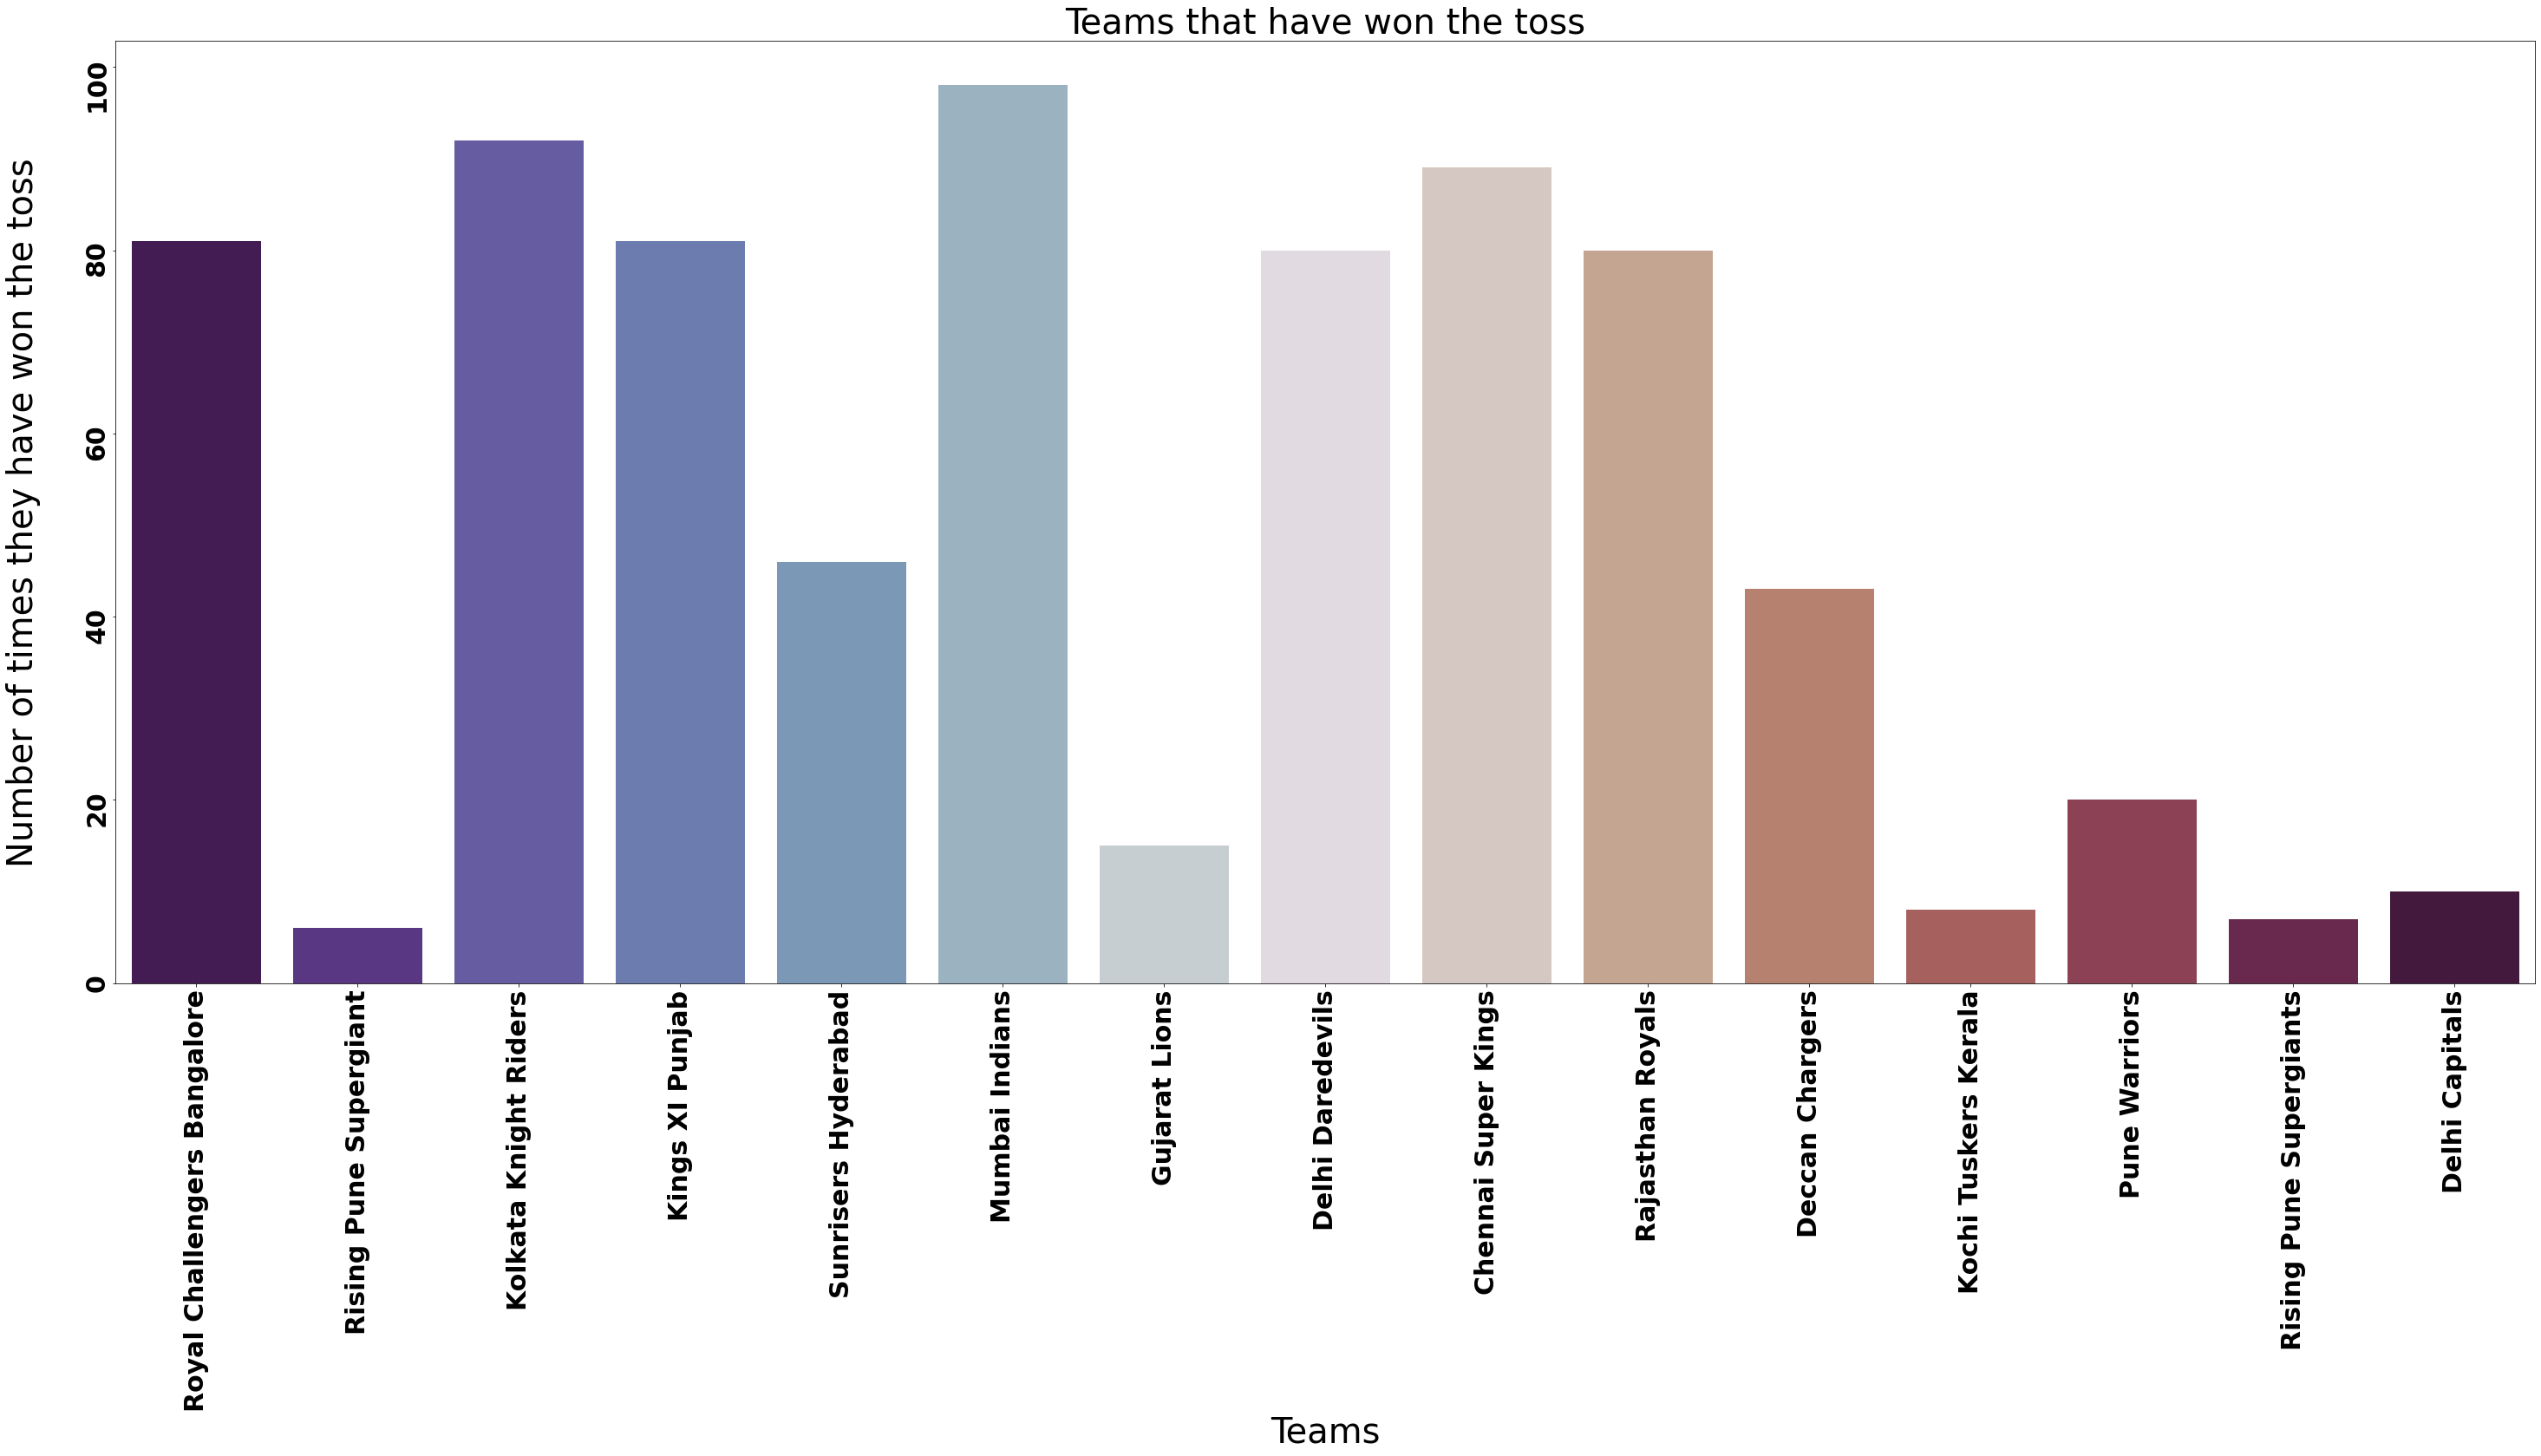

In [104]:

plt.figure(figsize = (50,20))
sns.countplot(matches['toss_winner'],palette = "twilight_shifted")
plt.xticks(rotation = 90, fontweight = "bold", size = 30)
plt.xlabel('Teams', fontsize = 40)
plt.ylabel('Number of times they have won the toss\n', fontsize = 40)
plt.title('Teams that have won the toss', fontsize = 40 )
plt.yticks(rotation = 90, fontweight = "bold", size = 30)

In [29]:
matches['Bat_1'].head(10)

0    35
1     0
2     0
3     0
4    15
5     0
6     0
7     0
8    97
9     0
Name: Bat_1, dtype: int64

In [30]:
matches['Bat_1'].ge(1).head(10)

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8     True
9    False
Name: Bat_1, dtype: bool

### Teams that have won the match by batting first

In [31]:
matches.iloc[matches[matches['Bat_1'].ge(1)].Bat_1.idxmax()]['winner']

'Mumbai Indians'

In [32]:
matches[matches['Bat_1'].ge(1)].Bat_1.idxmax()

43

In [33]:
print(f"The team who won by Batting first :- {matches.iloc[matches[matches['Bat_1'].ge(1)].Bat_1.idxmax()]['winner']}")

The team who won by Batting first :- Mumbai Indians


### Teams that won the most number of  seasons

In [34]:
winningteams = matches[['winner', 'season']]

In [35]:
winningteams.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [36]:
winningteams[winningteams.season == 2017]['winner'].tail(1)

58    Mumbai Indians
Name: winner, dtype: object

In [37]:
win_team = {}                              ## Created a dictionary to get winners of every season
for i in sorted(winningteams.season.unique()):
    win_team[i] = winningteams[winningteams.season == i]['winner'].tail(1).values[0]

winner_of_IPL = pd.Series(win_team)
winner_of_IPL = pd.DataFrame(winner_of_IPL, columns=['team'])
print(type(winner_of_IPL))

<class 'pandas.core.frame.DataFrame'>


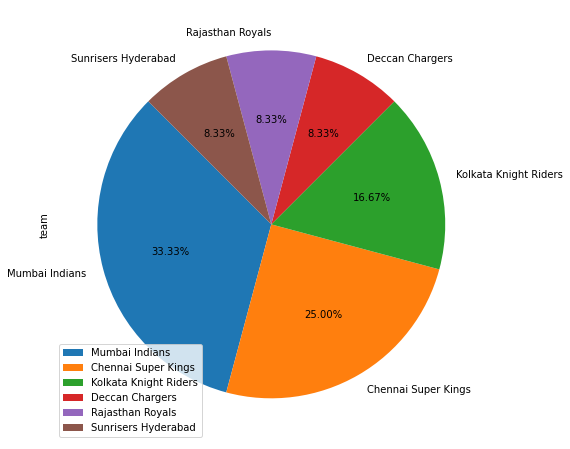

In [38]:
plt.figure(figsize = (20,8))
winner_of_IPL['team'].value_counts().plot(kind = "pie",fontsize = 10,autopct = '%4.2f%%',startangle = 135,legend = True)

### Deliveries Data

In [39]:
#importing the dataset
deli = pd.read_csv("deliveries.csv")
deli.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [40]:
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [41]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [42]:
deli.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [43]:
deli.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [44]:
deli.shape

(179078, 21)

In [45]:
deli.drop(['dismissal_kind','fielder'], axis =1,inplace=True   )

In [46]:
deli.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed'],
      dtype='object')

## Merging both the Datasets

In [47]:
deliveries = pd.merge(deli,matches,left_on='match_id',right_on = 'id')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,Bat_1,Ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [48]:
deliveries.shape

(179078, 37)

In [49]:
deliveries.size

6625886

In [50]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
id                       0
season                   0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                   0
Bat_1                    0
Ball_1                   0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
umpire3                  0
d

In [51]:
deliveries['player_dismissed'].fillna(value ='NA', inplace=True)

In [52]:
deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
id                  0
season              0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner              0
Bat_1               0
Ball_1              0
player_of_match     0
venue               0
umpire1             0
umpire2             0
umpire3             0
dtype: int64

In [53]:
deliveries.duplicated().sum()

23

In [54]:
deliveries.drop_duplicates()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,Bat_1,Ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


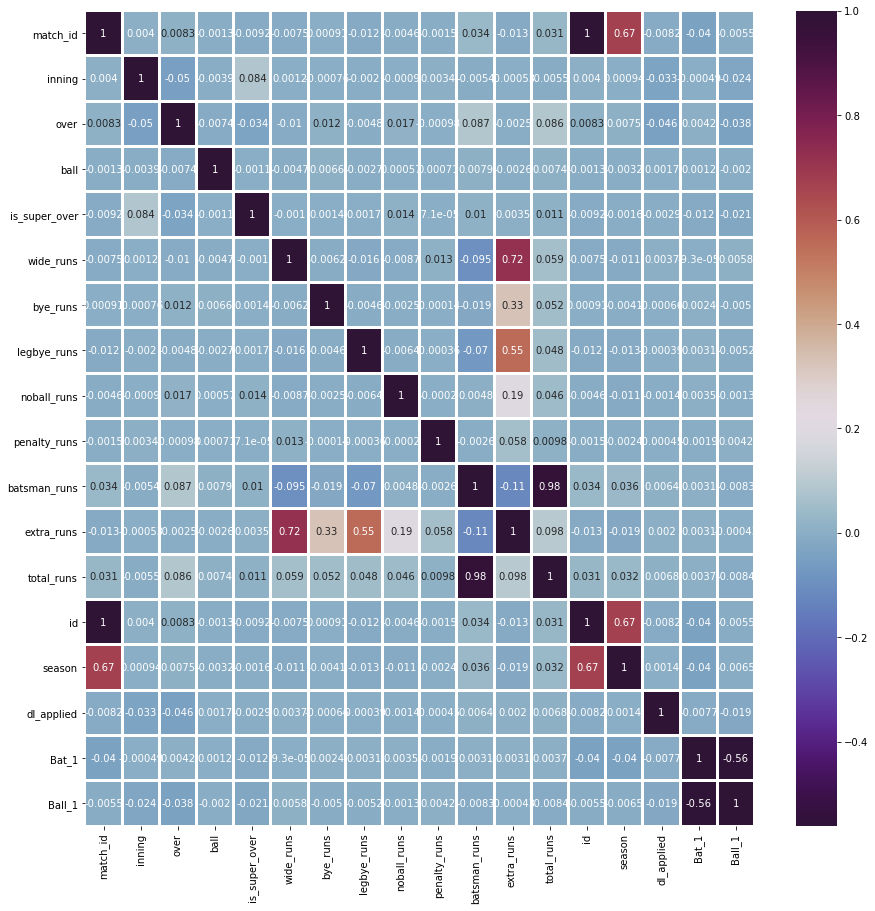

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(deliveries.corr(),annot=True,linewidth=2, cmap="twilight_shifted")

### Number of Matches Played in Each Stadium

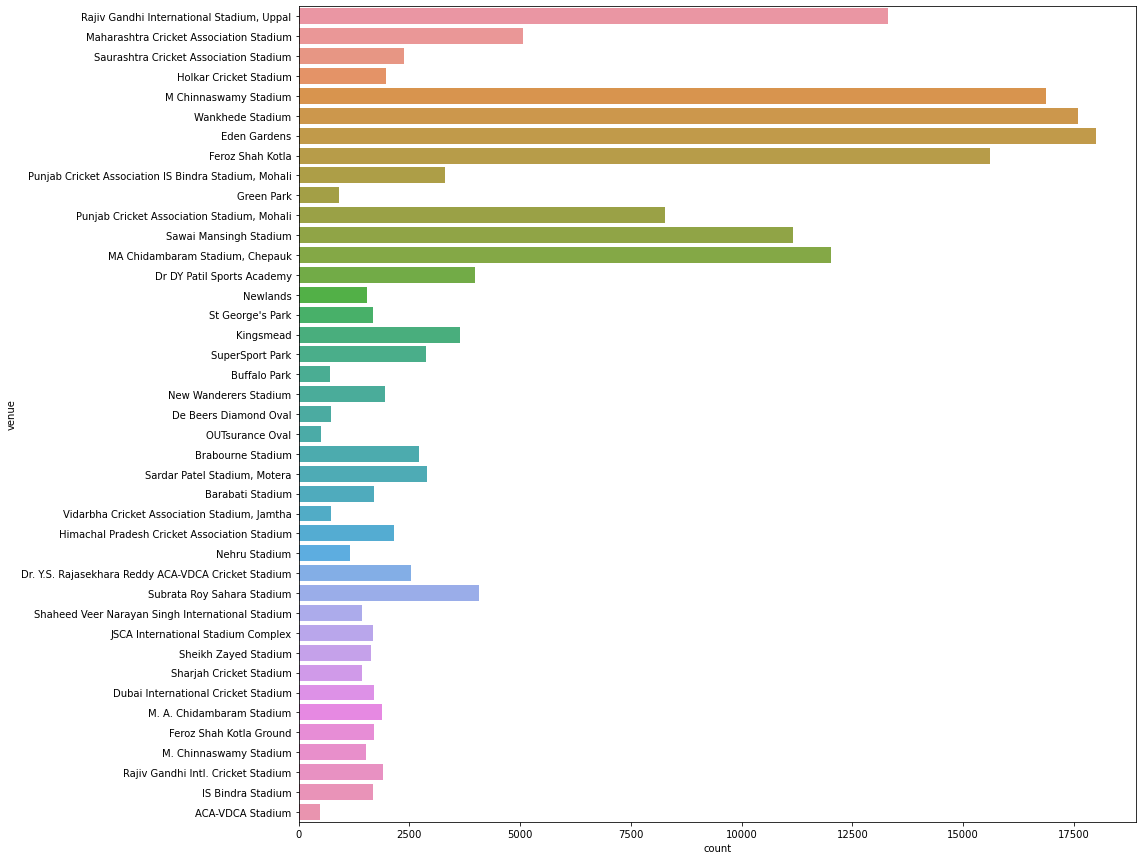

In [56]:
deliveries.venue.value_counts()
plt.figure(figsize=(15,15))
sns.countplot(data = deliveries, y = 'venue')

#deliveries['venue'].value_counts().plot(kind = "bar")


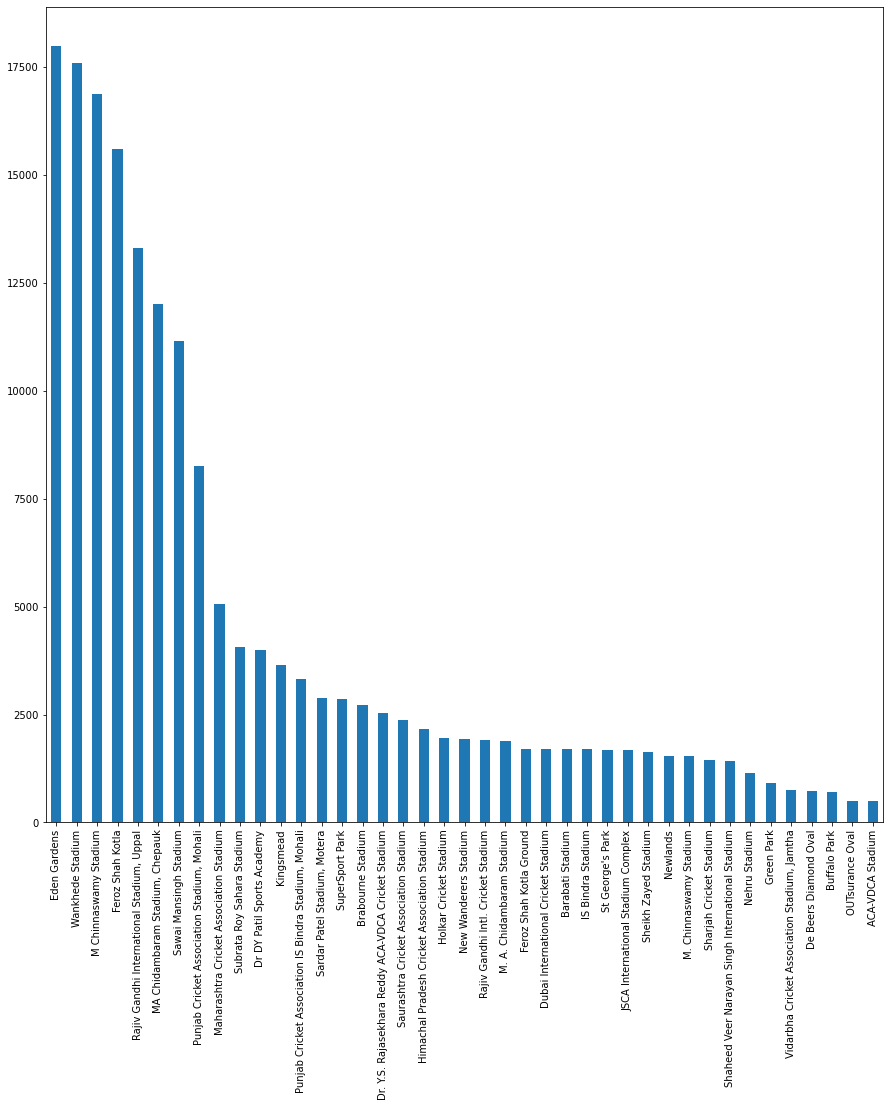

In [57]:
plt.figure(figsize=(15,15))
deliveries['venue'].value_counts().plot(kind = "bar")


### Decision after Toss

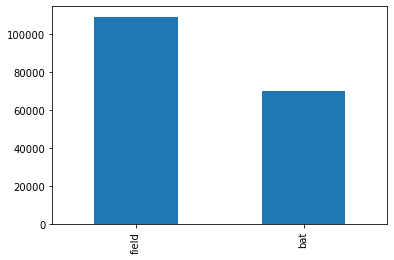

In [58]:
deliveries['toss_decision'].value_counts().plot(kind = "bar")

In [73]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed', 'id',
       'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'Bat_1', 'Ball_1',
       'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3',
       'team_toss_win'],
      dtype='object')

### Relation between Winning toss and victory

In [74]:
deliveries['team_toss_win'] = np.where(deliveries['toss_winner'] == deliveries['winner'],1,0)
deliveries['team_toss_win']


0         0
1         0
2         0
3         0
4         0
         ..
179073    1
179074    1
179075    1
179076    1
179077    1
Name: team_toss_win, Length: 179078, dtype: int32

Text(0.5, 0, 'Winning the Toss vs Winning the Match')

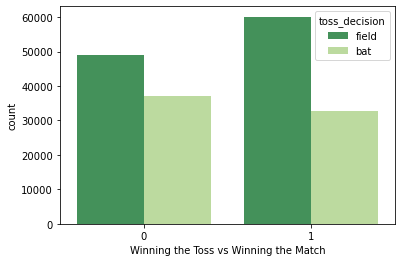

In [77]:
sns.countplot('team_toss_win', data = deliveries, hue = 'toss_decision', palette='YlGn_r')
plt.xlabel("Winning the Toss vs Winning the Match")

## Top 10 Batsmen

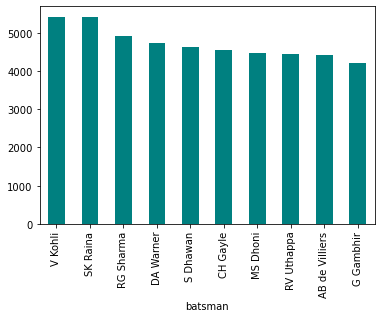

In [89]:
deliveries.groupby('batsman')['batsman_runs'].agg("sum").sort_values(ascending = False).head(10).plot(kind = 'bar',color= 'teal')

## Top 10 Bowlers

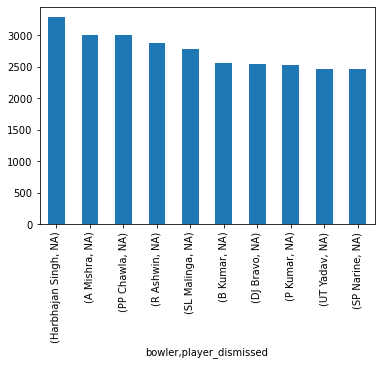

In [93]:
deliveries.groupby('bowler')['player_dismissed'].value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar')

# Observation

#### Best Team in IPL is Mumbai Indians.


#### Best Player in IPL is CH Gayle.


#### Winning Toss and Batting first are a factor that affect the victory.


#### Most matches have been played in Eden Gardens followed by Wankhede Stadium.


#### Most of the teams who win the toss choose to field first.


#### Teams who choose to field after winning the toss have higher chances of winning.


#### Virat Kohli and S.K Raina Scored the most runs, so probability is that in whichever team they are that team has high chances of winning by runs and comapnies can also hire them to endorse products of batting.



#### Harbhajan Singh and Amit Mishra took the most wickets, so probability is that in whichever team they are that team has high chances of winning by wickets and companies can also hire them to endorse products of bowling.


#### Top Players like, CH Gayle, AB de Villiers, MS Dhoni, and DA Warner can be hired by many companies to endorse their products as they have a huge fanbase.

# Thank You